In [1]:
import getpass, time
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import available_backends, execute, register, least_busy

# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

from qiskit import register, available_backends, get_backend
try:
    import sys
    sys.path.append("C:\Qiskit-tutorial-master") # go to parent dir
    import Qconfig
    qx_config = {
        "APItoken": Qconfig.APItoken,
        "url": Qconfig.config['url']}
except Exception as e:
    print(e,"hata")
    #set api
register(qx_config['APItoken'], qx_config['url'])

In [2]:
backend = "ibmq_qasm_simulator" 
#backend = least_busy(available_backends({'simulator': False, 'local': False}))
print("The least busy backend is " + backend)

The least busy backend is ibmq_qasm_simulator


In [3]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)
qc.h(q[1])
qc.cx(q[1], q[2])
qc.cx(q[0], q[1])
qc.h(q[0])
qc.measure(q, c)
job_exp = execute(qc, backend=backend, shots=1024, max_credits=3)

lapse = 0
interval = 30
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
{'job_id': '5b8174277c42aa0037a2799b', 'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': 'job has successfully run'}


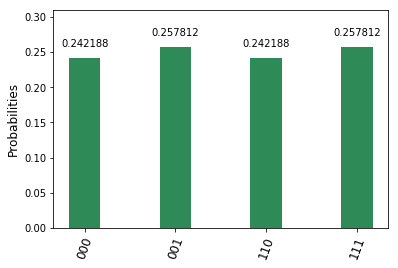

You have made entanglement!


In [4]:
plot_histogram(job_exp.result().get_counts(qc))

print('You have made entanglement!')

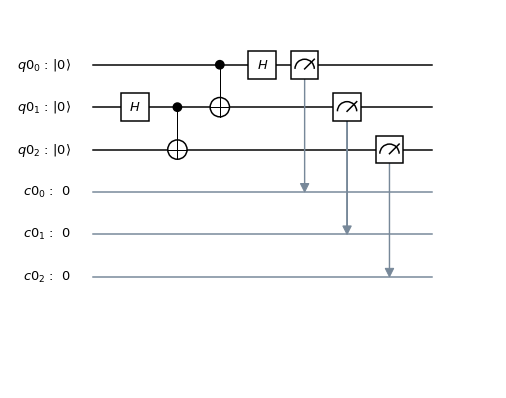

In [5]:
circuit_drawer(qc)